In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)

## 🔍 1️⃣ Exploratory Data Analysis (EDA)


#### 1. Load Data


In [101]:
# Load train and test datasets
df = pd.read_csv("dataset/train.csv", low_memory=False)

In [102]:
print("Dataset shape:", df.shape)

Dataset shape: (1460, 81)


In [103]:
print("First rows", df.head(), sep="\n")

First rows
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

In [104]:
print("Info", df.info(), sep="\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 2. Handle Missing Values


In [105]:
print(df.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64


In [106]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

In [107]:
categorical_features = df.select_dtypes(include=["object"]).columns
df[categorical_features] = df[categorical_features].fillna("MISSING")

In [108]:
print(df.isnull().sum().sort_values(ascending=False))

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


#### 3. Summary Statistics


In [109]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731373   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#### 4. Visualizing Target Variable (`SalePrice`)


In [110]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

###### Distribution of Numerical Features with SalePrice


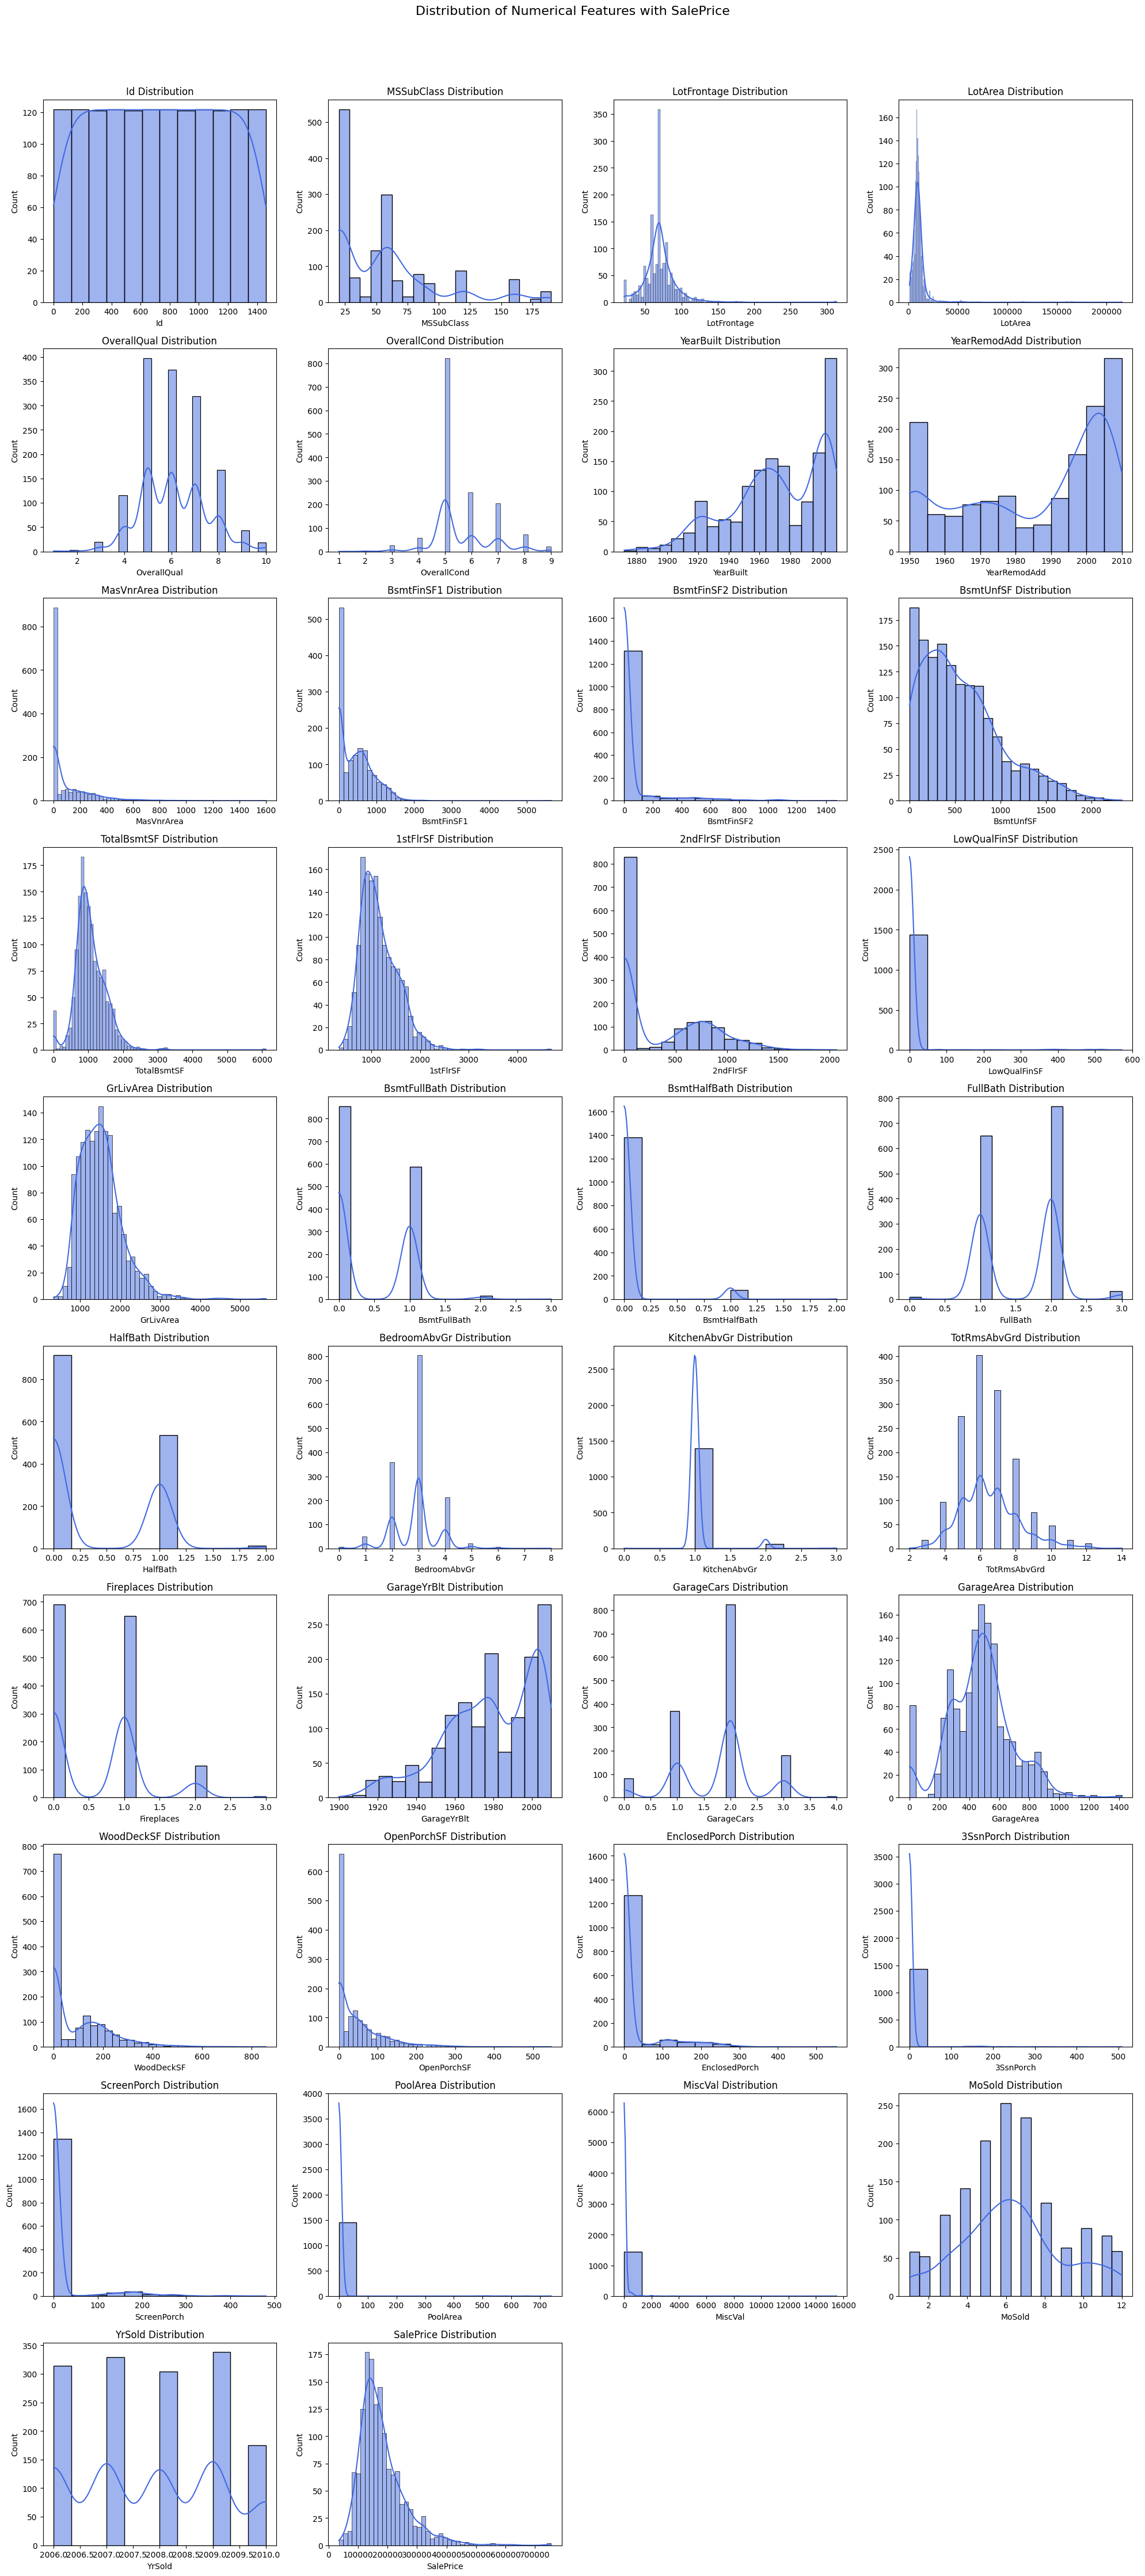

In [111]:
fig, axes = plt.subplots(
    nrows=len(numerical_features) // 4 + 1,
    ncols=4,
    figsize=(20, len(numerical_features) * 1.2),
)
fig.suptitle("Distribution of Numerical Features with SalePrice", fontsize=16)

axes = axes.flatten()  # Flatten the 2D array for easier iteration

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color="royalblue")
    axes[i].set_title(f"{col} Distribution")

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###### SalePrice Distribution Across Categorical Features


/tmp/ipykernel_80543/1522053215.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_80543/1522053215.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_80543/1522053215.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_80543/1522053215.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_80543/1522053215.py:13: UserWarning: set_ticklabels()

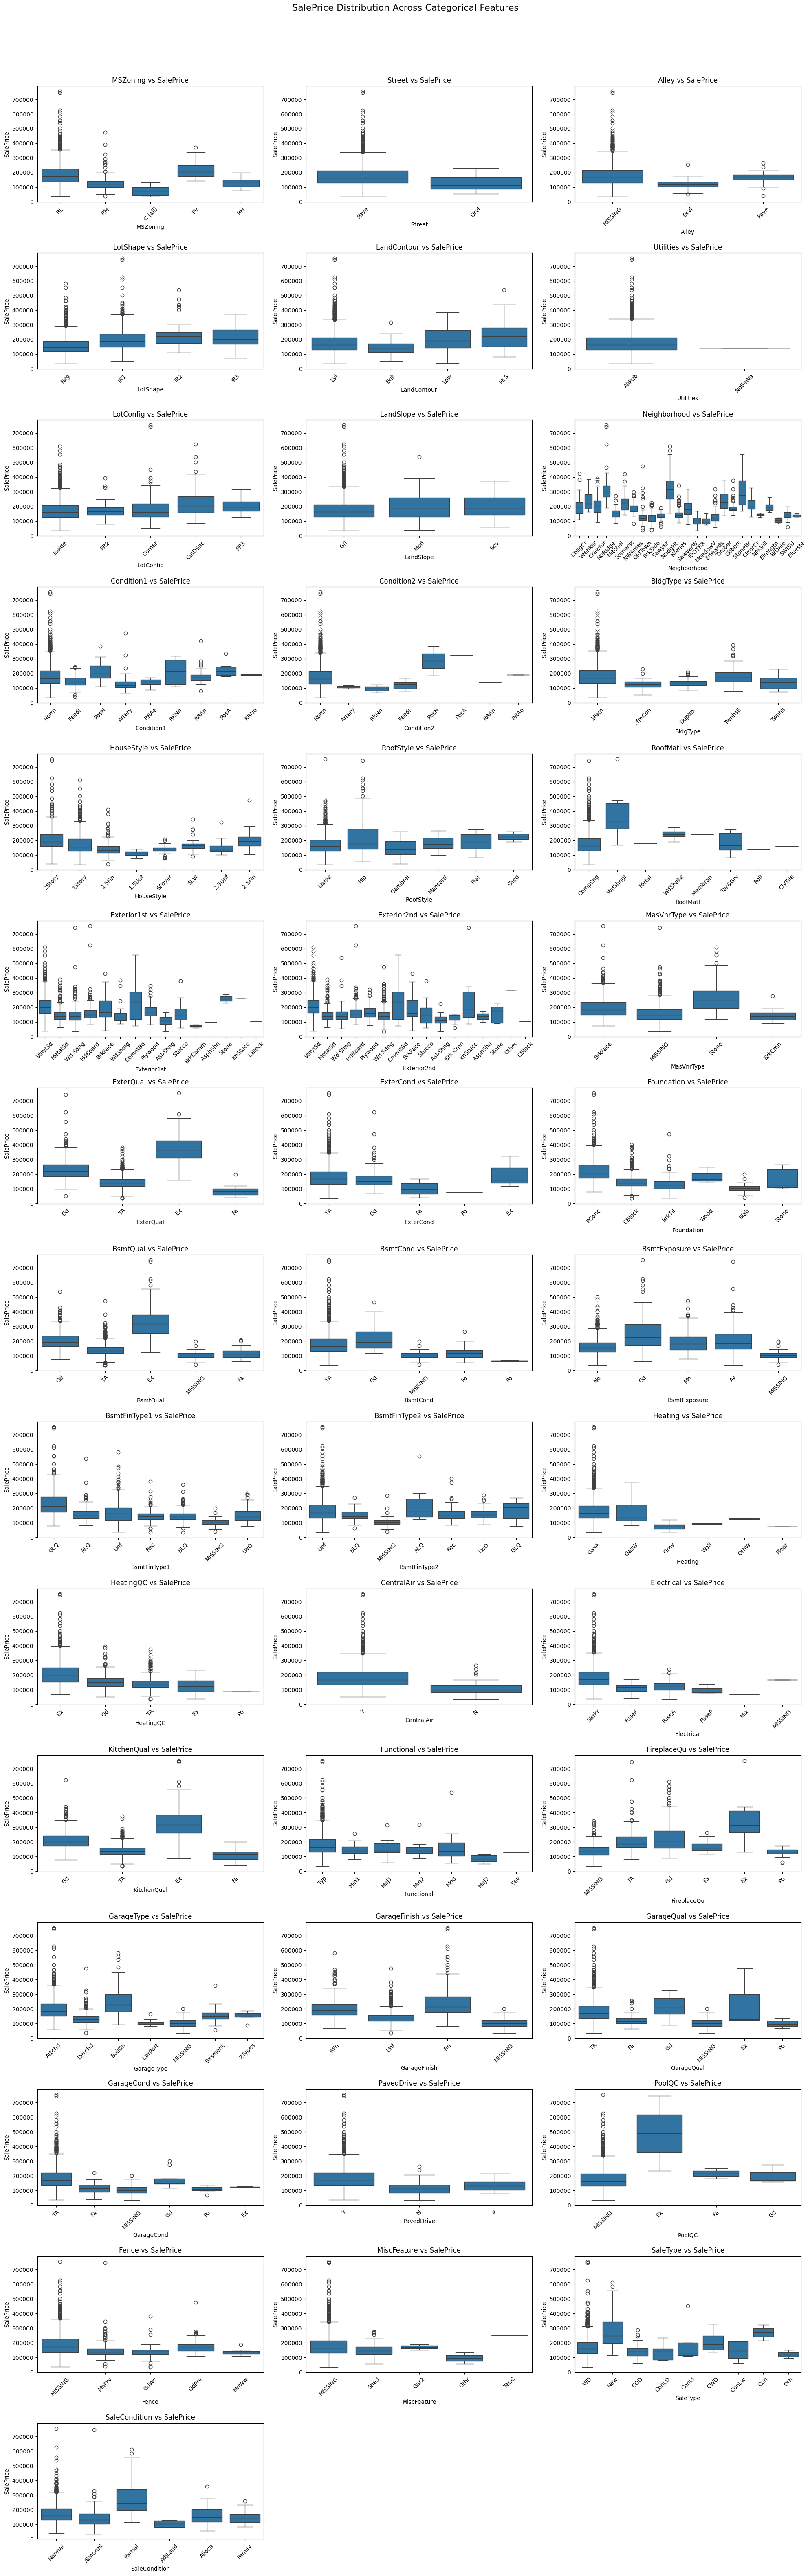

In [112]:
fig, axes = plt.subplots(
    nrows=len(categorical_features) // 3 + 1,
    ncols=3,
    figsize=(20, len(categorical_features) * 1.5),
)
fig.suptitle("SalePrice Distribution Across Categorical Features", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.boxplot(x=df[col], y=df["SalePrice"], ax=axes[i])
    axes[i].set_title(f"{col} vs SalePrice")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###### Scatterplots of Numerical Features vs. SalePrice


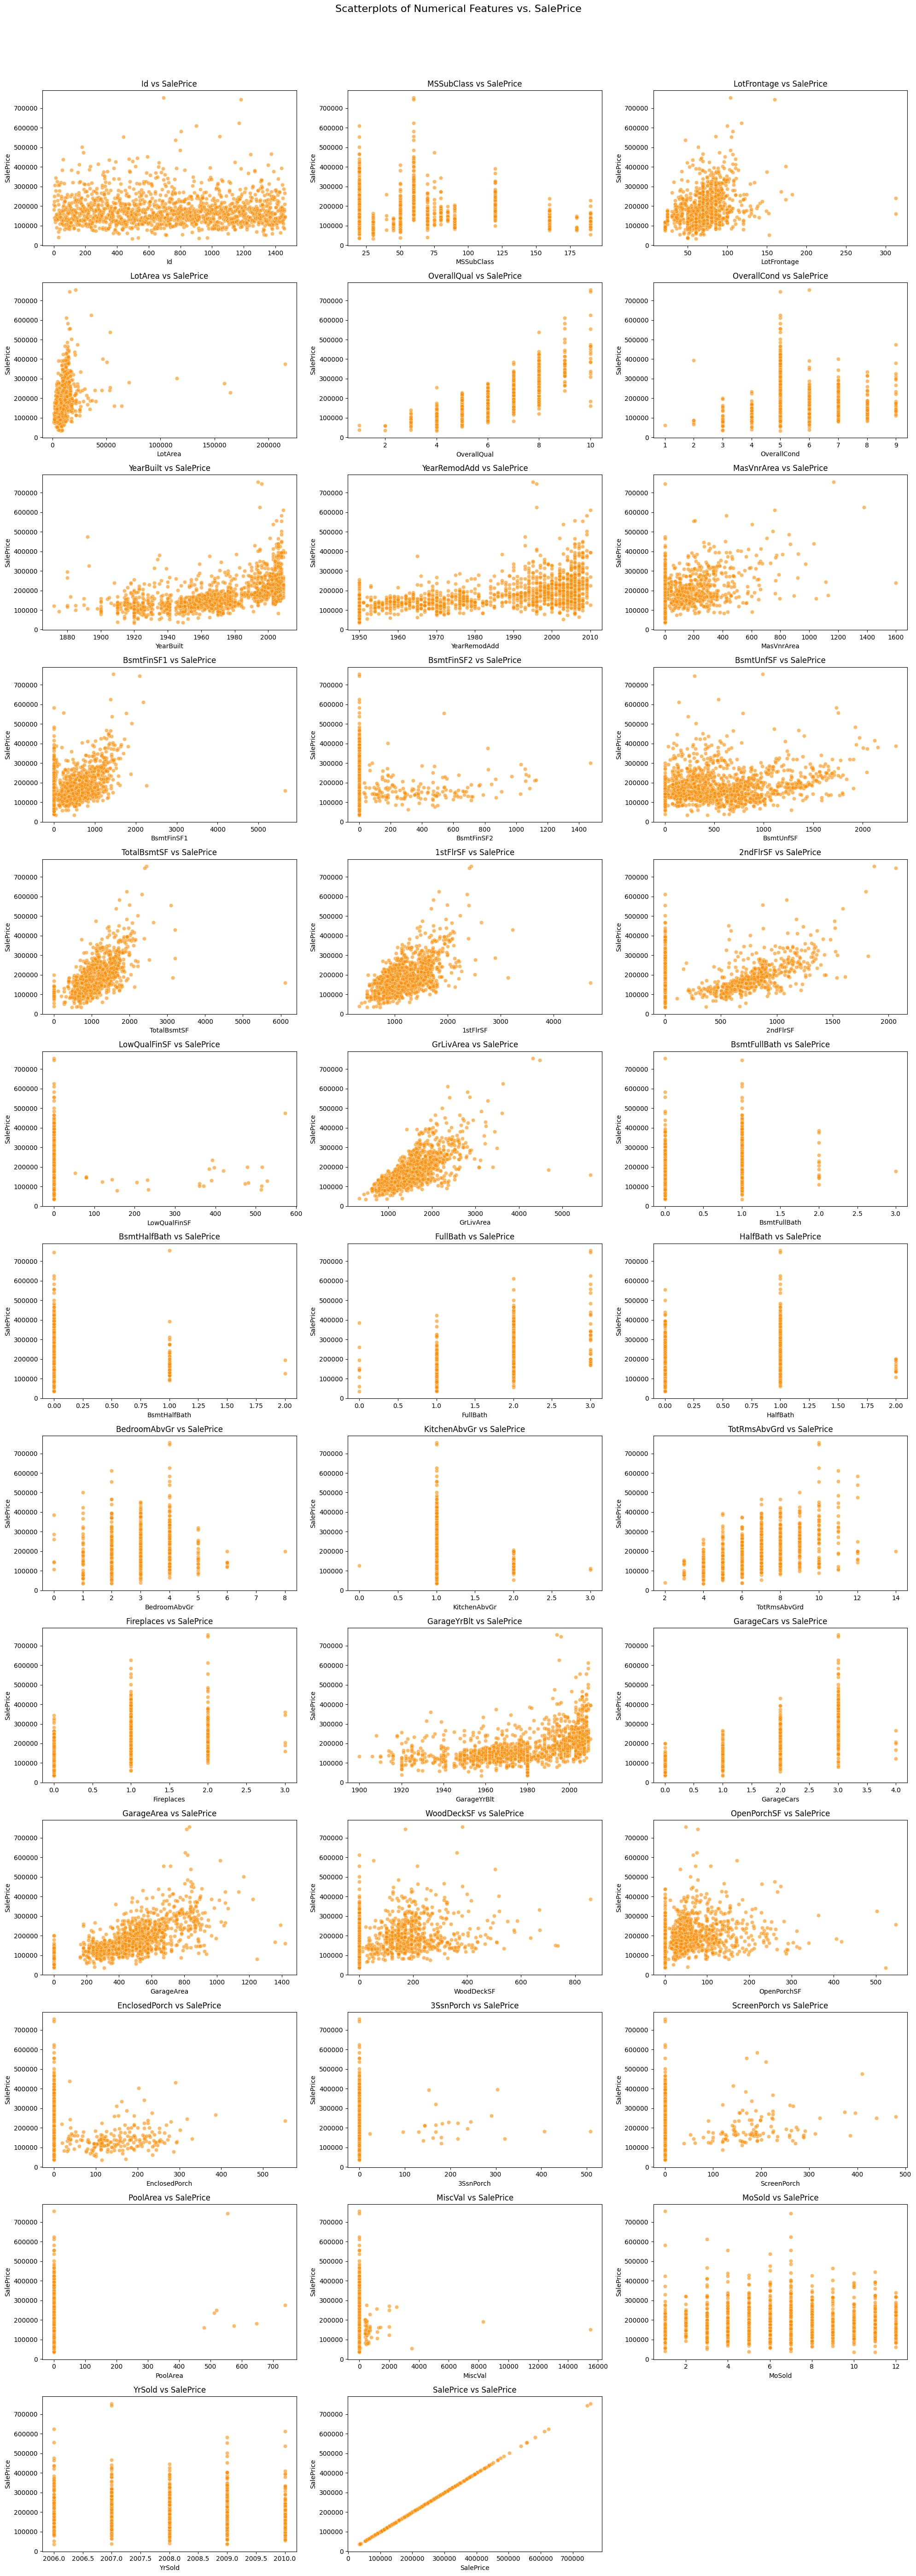

In [113]:
fig, axes = plt.subplots(
    nrows=len(numerical_features) // 3 + 1,
    ncols=3,
    figsize=(20, len(numerical_features) * 1.5),
)
fig.suptitle("Scatterplots of Numerical Features vs. SalePrice", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.scatterplot(
        x=df[col], y=df["SalePrice"], alpha=0.6, color="darkorange", ax=axes[i]
    )
    axes[i].set_title(f"{col} vs SalePrice")

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 5. Correlation Analysis


In [114]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

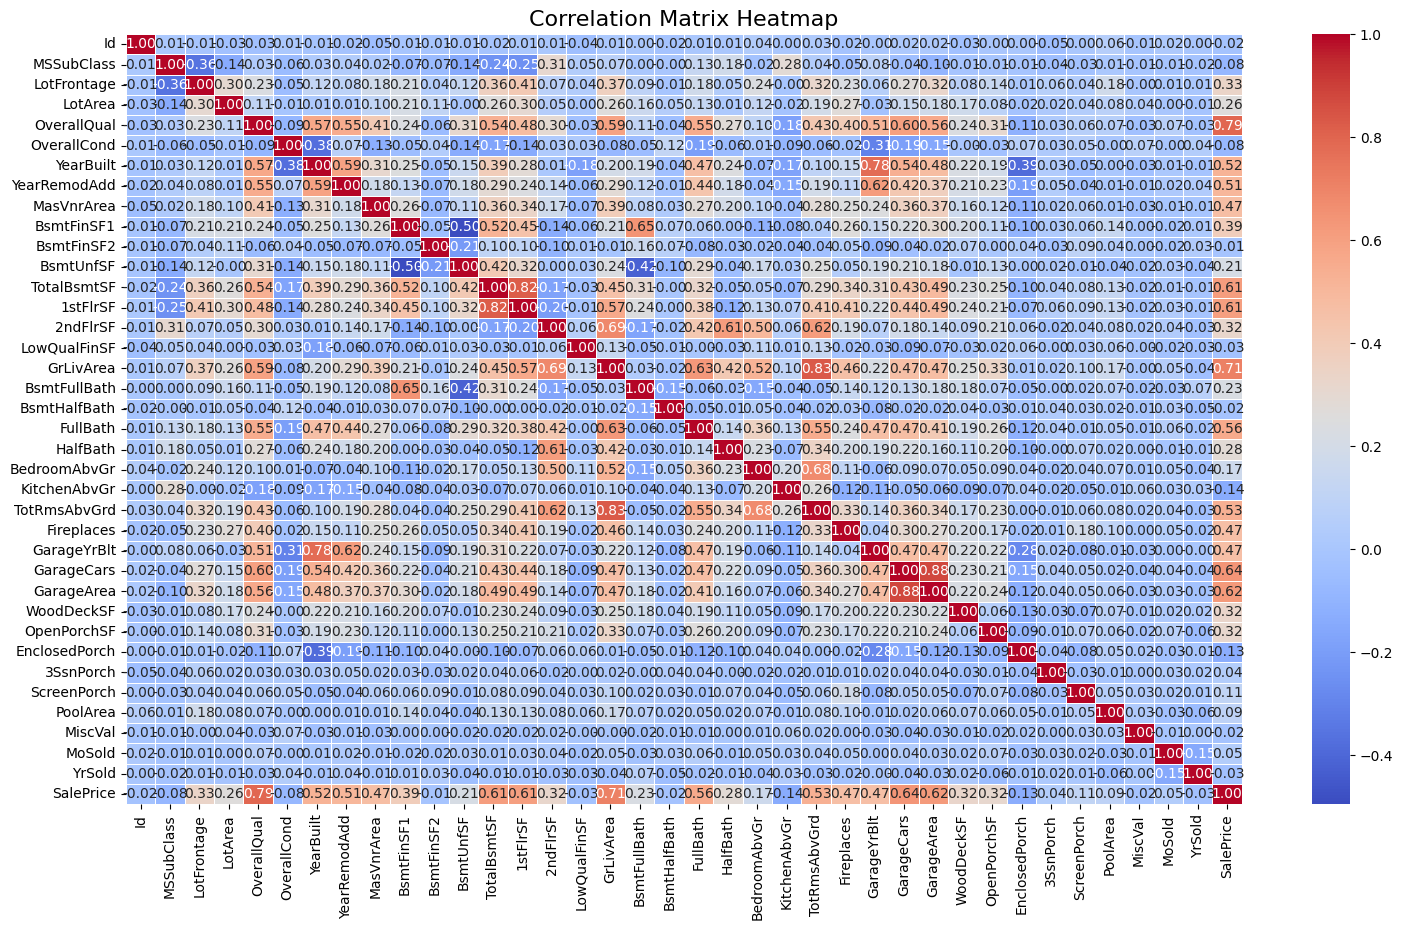

In [115]:
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [116]:
print(df.isnull().sum().sort_values(ascending=False))

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


## 📌 2️⃣ Data Preprocessing


#### 1. Feature Enginneering


In [117]:
# Older houses may have different pricing patterns than newer ones.
# 🏠 Creating House Age Feature
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]

# 🔨 Remodeling Indicator
# Some houses are renovated, affecting their value.
df["WasRemodeled"] = (df["YearRemodAdd"] != df["YearBuilt"]).astype(int)

# 📏 Total Square Footage
# Combining basement, first, and second-floor areas into a single feature.
df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]

df["LotQual"] = df["LotArea"] * df["OverallQual"]

#### 2. Encoding Categorical Features


In [118]:
# Some categorical variables have a natural order (e.g., quality ratings).
quality_features = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]

bsmt_features = [
    "BsmtQual",
    "BsmtCond",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
]

# Mapping pour chaque feature
quality_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
bsmt_mapping = {"MISSING": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

# Appliquer le mapping
for col in quality_features:
    df[col] = df[col].map(quality_mapping)

for col in bsmt_features:
    df[col] = df[col].map(bsmt_mapping)

In [119]:
# For categorical features without any ranking, we use one-hot encoding.
categorical_features = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

## 📊 3️⃣ Feature Selection


In [120]:
# ✅ Step 2: Feature Importance using XGBoost
# *******************************************

# X = df.drop(columns=["SalePrice"])  # Features
# y = df["SalePrice"]  # Target

# # Train an XGBoost model
# xgb = XGBRegressor(n_estimators=100, random_state=42)
# xgb.fit(X, y)

# # Get feature importance
# xgb_importance = xgb.feature_importances_
# xgb_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": xgb_importance})
# xgb_importance_df.sort_values(by="Importance", ascending=False, inplace=True)

# # Plot top 20 important features
# plt.figure(figsize=(12, 6))
# sns.barplot(x="Importance", y="Feature", data=xgb_importance_df[:20])
# plt.title("Top 20 Important Features (XGBoost)")
# plt.show()

# # Drop low-importance features
# threshold = 0.005
# selected_features_xgb = xgb_importance_df[xgb_importance_df["Importance"] > threshold][
#     "Feature"
# ].tolist()

# print(f"Selected features (XGBoost): {selected_features_xgb}")

In [121]:
# ✅ Step 3: Keep only the selected features in the dataset
# ************************************************

# df = df[selected_features_xgb + ["SalePrice"]]

## 🚀 4️⃣ Model Training & Evaluation


#### 📌 Step 1: Train-Test Split


In [122]:
# Define features (X) and target variable (y)
# df
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (1168, 237), Testing Set: (292, 237)


#### 📌 Step 2: Standardization


In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 📌 Step 3: Choose & Train Models


In [124]:
# Define models with default parameters
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    ),
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R² Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": root_mean_squared_error(y_test, y_pred),
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

Training Random Forest...
Training XGBoost...
               R² Score           MAE          RMSE
Random Forest  0.881379  18221.439658  30163.903781
XGBoost        0.906075  16949.800781  26840.914062


In [125]:
# Define parameter grid for XGBoost tuning
param_grid = {
    "n_estimators": [100, 250, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
}

# Grid Search for best parameters
xgb_tuned = GridSearchCV(
    XGBRegressor(random_state=42), param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=2
)
xgb_tuned.fit(X_train, y_train)

# Best parameters
print("🚀 Best XGBoost Parameters:", xgb_tuned.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.3s
[CV] END 

In [126]:
# Train optimized model
best_xgb = XGBRegressor(
    **xgb_tuned.best_params_,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
)
best_xgb.fit(X_train, y_train)

# Predict on test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate performance
xgb_r2_best = r2_score(y_test, y_pred_best_xgb)
xgb_mae_best = mean_absolute_error(y_test, y_pred_best_xgb)
xgb_rmse_best = root_mean_squared_error(y_test, y_pred_best_xgb)

print(
    f"✅ Optimized XGBoost Results: R² = {xgb_r2_best:.4f}, MAE = {xgb_mae_best:.4f}, RMSE = {xgb_rmse_best:.4f}"
)

✅ Optimized XGBoost Results: R² = 0.9096, MAE = 16131.8066, RMSE = 26333.2285


In [129]:
# Make predictions on the test set using the optimized XGBoost model
y_test_pred = best_xgb.predict(X_test)

# Evaluate the final model performance
final_r2 = r2_score(y_test, y_test_pred)
final_mae = mean_absolute_error(y_test, y_test_pred)
final_rmse = root_mean_squared_error(y_test, y_test_pred)

# Print final test results
print("="*50)
print("📊 FINAL MODEL PERFORMANCE ON TEST DATA")
print(f"✅ R² Score: {final_r2:.5f}")
print(f"✅ Mean Absolute Error (MAE): {final_mae:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {final_rmse:.2f}")
print("="*50)

📊 FINAL MODEL PERFORMANCE ON TEST DATA
✅ R² Score: 0.90959
✅ Mean Absolute Error (MAE): 16131.81
✅ Root Mean Squared Error (RMSE): 26333.23
